<a href="https://colab.research.google.com/github/ThinkingBeyond/BeyondAI-2024/blob/main/shaana-karuna/Visualisations_for_Poster_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary of code

The purpose of this code is to create visualisations for our proof on our research poster. It uses the Manim library to create visualisations. The visualisations creates are as follows:

1. Visualisation of a discrete piecewise function
2. Visualisation of a tower function
3. Visualisation of another discrete piecewise function
4. Visualisation of a bump function
4. Visualisation of a step function

All videos are saved in Files > jupyter.

#Installing dependencies
This section installs Manim and IPython.

In [40]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim==0.18.1
!pip install IPython==8.21.0

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
48 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

#Importing manim

In [41]:
from manim import *

#Setting colours for visualisation
This section uses specific hex codes to define colours to be used later.

In [42]:
GREENISHWHITE = ManimColor.from_hex("#e6ebd5")
NEWDARKGREEN = ManimColor.from_hex("#17282a")
NEWMEDIUMGREEN = ManimColor.from_hex("#93c280")

#Visualisation for section in poster titled: 'MLPs with sigmoid activation can approximate continuous functions'

##1. Visualisation of a discrete piecewise function

This section creates a video of a discrete piecewise function which consists of nine planes. The axes and function rotate, allowing us to better understand the visualisation and take screenshots at different angles for the poster.

In [43]:
%%manim -qm -v WARNING DiscretePiecewise



class DiscretePiecewise(ThreeDScene):
    def construct(self):

#Set the background colour.
        self.camera.background_color = GREENISHWHITE

#Define the axes.
        axes = ThreeDAxes(
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
            z_range=[-3, 3, 1],
            axis_config={"include_numbers": True})

        axes.x_axis.set_color(NEWDARKGREEN)
        axes.y_axis.set_color(NEWDARKGREEN)
        axes.z_axis.set_color(NEWDARKGREEN)
        planes = []


#Using a loop to define 9 planes.
        for i in range(3):
            for j in range(3):

                plane = Rectangle(width=1.8, height=1.8, color=NEWDARKGREEN, fill_opacity=0.5)

                plane.move_to(axes.c2p(i+0.5, j+0.5, i+j))

                planes.append(plane)

#Setting the camera angles.
        self.set_camera_orientation(phi=75 * DEGREES, theta=45 * DEGREES)
        self.renderer.camera.fov = 120 * DEGREES

#Adding both the axes and plane to the scene.
        self.add(axes, *planes)


#Rotating so we can get pictures from different angles.
        self.begin_ambient_camera_rotation(rate=2)
        self.wait(5)
        self.stop_ambient_camera_rotation()
        self.wait()

Manim Community v0.18.1

#Visualisations for section in poster titled: 'Breakdown of Nielsen’s visual proof'

##2. Visualisation of a tower function

This visualisation creates a tower function plotted on a grid surface on a graph with 3 axes.


###Code:

In [44]:
class Tower(ThreeDScene):
    def construct(self):

#Set the background colour.
        self.camera.background_color = GREENISHWHITE

#Define the axes.
        axes = ThreeDAxes( #Creating axes
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
            z_range=[0, 6, 1],
            axis_config={"include_numbers": True}
        )
        axes.x_axis.set_color(NEWDARKGREEN)
        axes.y_axis.set_color(NEWDARKGREEN)
        axes.z_axis.set_color(NEWDARKGREEN)


#Defining a grid surface for the tower to make the visualisation easier to comprehend
        grid = Surface(
            lambda u, v: axes.c2p(u, v, 0),
            u_range=[-3, 3],
            v_range=[-3, 3],
            resolution=(20, 20),
            color=NEWDARKGREEN,
            fill_opacity=0.05
        )

#Defining and positioning the tower
        tower = Prism( #Creating the shape of the tower function
            dimensions=(0.5, 0.5, 2),
            fill_color=NEWMEDIUMGREEN,
            fill_opacity=0.9
        )
        tower.move_to(axes.c2p(0, 0, 1)) #Positioning the tower function


#Set the camera angles
        self.set_camera_orientation(phi=60 * DEGREES, theta=45 * DEGREES)

#Displaying all the components (axes, grid surface and tower) by adding them to the scene
        self.add(axes, grid, tower)
        self.wait()

###Display image:

Manim Community v0.18.1

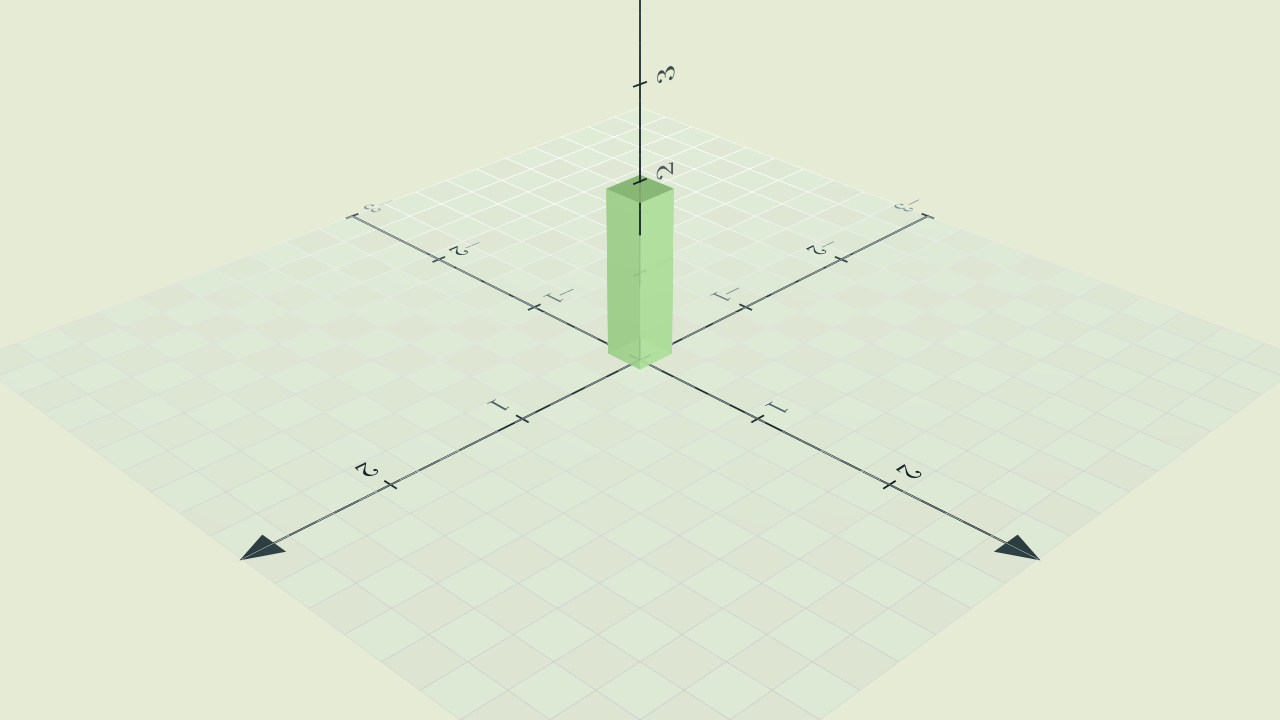

In [45]:
%%manim -qm -v WARNING -s Tower

##3. Visualisation of another discrete piecewise function
This visualisation creates a second discrete piecewise function with different colours (for the poster). This plot does not rotate.

###Code:

In [46]:
class Piecewise2(ThreeDScene):
    def construct(self):

#Set the background colour.
        self.camera.background_color = GREENISHWHITE

#Define the axes.
        axes = ThreeDAxes(
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
            z_range=[0, 6, 1],
            axis_config={"include_numbers": True}
        )
        axes.x_axis.set_color(NEWDARKGREEN)
        axes.y_axis.set_color(NEWDARKGREEN)
        axes.z_axis.set_color(NEWDARKGREEN)


#Defining a grid surface to make the visualisation easier to understand.
        grid = Surface(
            lambda u, v: axes.c2p(u, v, 0),
            u_range=[-3, 3],
            v_range=[-3, 3],
            resolution=(20, 20),
            color=NEWDARKGREEN,
            fill_opacity=0.05
        )

#Using a loop as before to create 9 planes
        planes = []

        for i in range(3):
            for j in range(3):

                plane = Rectangle(width=1.8, height=1.8, color=NEWMEDIUMGREEN, fill_opacity=0.5)


                plane.move_to(axes.c2p(i+0.5, j+0.5, i+j))

                planes.append(plane)

#Setting the camera angles
        self.set_camera_orientation(phi=75 * DEGREES, theta=45 * DEGREES)
        self.renderer.camera.fov = 120 * DEGREES

#Displaying all the components
        self.add(axes, *planes, grid)
        self.wait()

###Display image:

Manim Community v0.18.1

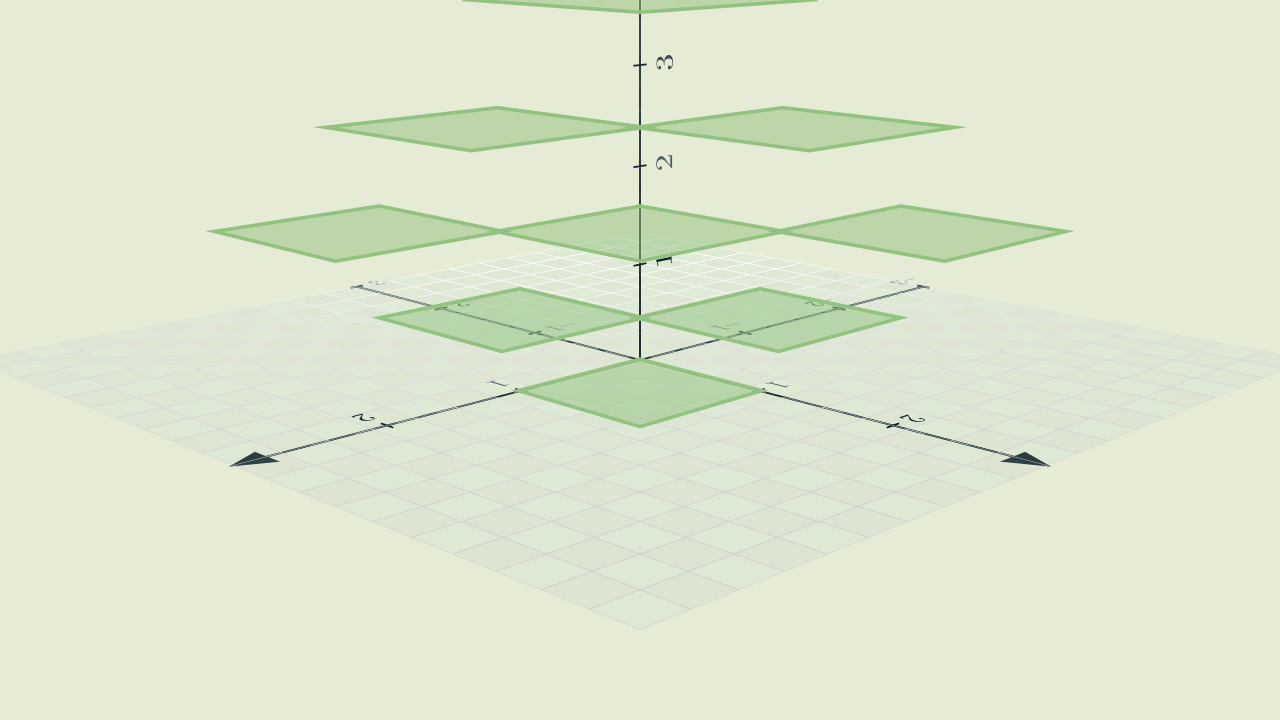

In [47]:
%%manim -qm -v WARNING -s Piecewise2

##4. Visualisation of a bump function

A bump function is visualised by using a parametrically defined grid surface.


###Code:

In [48]:
class Bump(ThreeDScene):
    def construct(self):

#Set the background colour.
        self.camera.background_color = GREENISHWHITE

#Define the axes.
        axes = ThreeDAxes(
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
            z_range=[0, 6, 1],
            axis_config={"include_numbers": True}
        )
        axes.x_axis.set_color(NEWDARKGREEN)
        axes.y_axis.set_color(NEWDARKGREEN)
        axes.z_axis.set_color(NEWDARKGREEN)

##Using a surface to parametrically define the bump function.
#Defining the function which calculates the z value (output) of the bump function given an input point (x, y)
        def bump_function(x, y):
            if x>-1 and x<1:
                return 2
            else:
                return 0

#Defining the bump function as a parametric grid surface with grid lines with an opacity of 0
        grid = Surface(
            lambda u, v: axes.c2p(u, v, bump_function(u, 0)),
            u_range=[-3, 3],
            v_range=[-3, 3],
            resolution=(20, 20),
            fill_opacity=100
        )
        grid.set_style(fill_opacity=0.8, fill_color=NEWMEDIUMGREEN, stroke_opacity=0)


#Defining a flat, plane grid surface for the bump function to be on to make the visualisation easier to understand.
        grid2 = Surface(
            lambda u, v: axes.c2p(u, v, 0),
            u_range=[-3, 3],
            v_range=[-3, 3],
            resolution=(20, 20),
            color=NEWDARKGREEN,
            fill_opacity=0.05
        )

#Setting the camera angles
        self.set_camera_orientation(phi=75 * DEGREES, theta=45 * DEGREES)
        self.renderer.camera.fov = 120 * DEGREES

#Displaying all the components by adding them to the scene (axes, grid and grid2)
        self.add(axes, grid, grid2)
        self.wait()

###Display image:

Manim Community v0.18.1

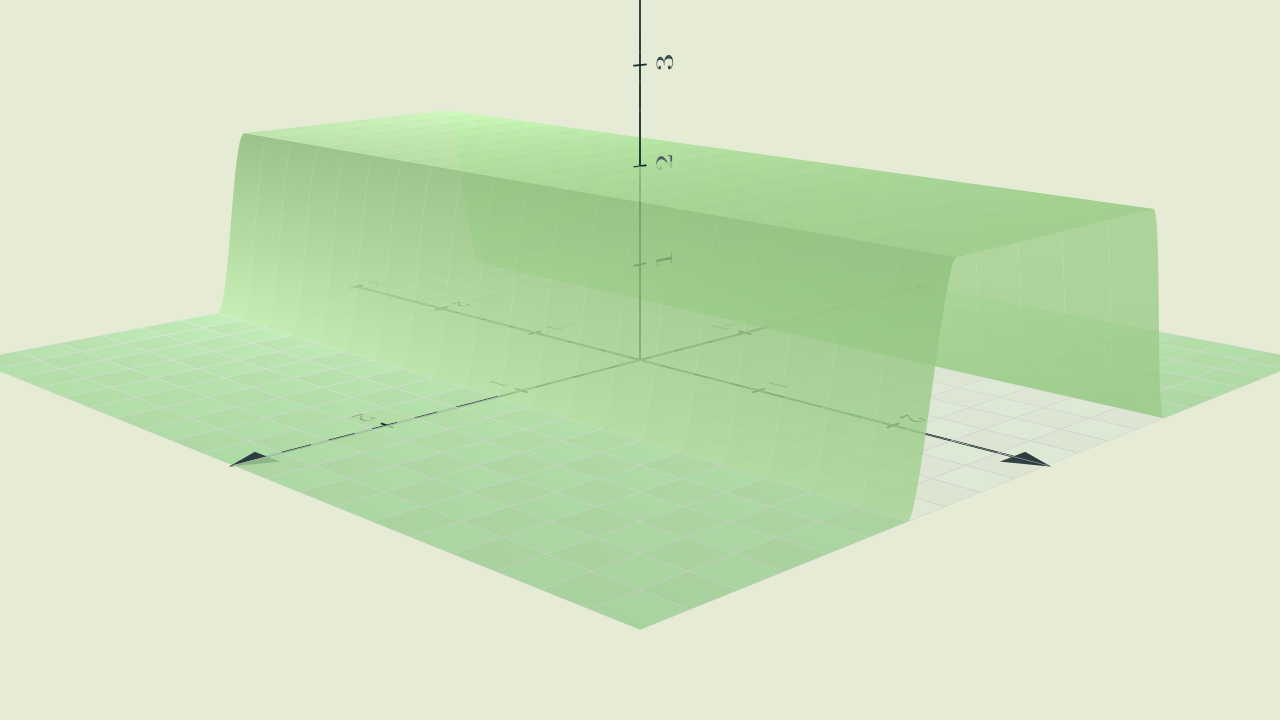

In [49]:
%%manim -qm -v WARNING -s Bump

##5. Visualisation of a step function

A step function is defined by plotting 2 planes (using surfaces) on a 3D graph with 3 axes.

###Code:

In [50]:
class Step(ThreeDScene):
    def construct(self):

 #Set the background colour.
        self.camera.background_color = GREENISHWHITE

#Define the axes.
        axes = ThreeDAxes(
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
            z_range=[0, 6, 1],
            axis_config={"include_numbers": True}
        )
        axes.x_axis.set_color(NEWDARKGREEN)
        axes.y_axis.set_color(NEWDARKGREEN)
        axes.z_axis.set_color(NEWDARKGREEN)

#Defining the function which calculates the z value (output) of the step function given an input point (x, y)
        def step_function(x):
          return 1 if x>0 else 0

#Creating the plane for the part of the step function where the output is 0 by using the Surface class.
        grid = Surface(
            lambda u, v: axes.c2p(u, v, 0),
            u_range=[-3, 0],
            v_range=[-3, 3],
            resolution=(20, 20),
            fill_opacity=1
        )
        grid.set_style(fill_opacity=0.8, fill_color=NEWMEDIUMGREEN, stroke_opacity=0)

#Creating the plane for the part of the step function where the output is 1 by using the Surface class.
        grid3 = Surface(
            lambda u, v: axes.c2p(u, v, 1),
            u_range=[0, 3],
            v_range=[-3, 3],
            resolution=(20, 20),
            fill_opacity=1
        )
        grid3.set_style(fill_opacity=0.8, fill_color=NEWMEDIUMGREEN, stroke_opacity=0)

#Defining a flat, plane grid surface for the step function to be on to make the visualisation easier to understand.
        grid2 = Surface(
            lambda u, v: axes.c2p(u, v, 0),
            u_range=[-3, 3],
            v_range=[-3, 3],
            resolution=(20, 20),
            color=NEWDARKGREEN,
            fill_opacity=0.05
        )

#Setting the camera angles
        self.set_camera_orientation(phi=75 * DEGREES, theta=45 * DEGREES)
        self.renderer.camera.fov = 120 * DEGREES

#Displaying all the components by adding them to the scene (axes, grid, grid2 and grid3)
        self.add(axes, grid,grid2,grid3)
        self.wait()

###Display image:

Manim Community v0.18.1

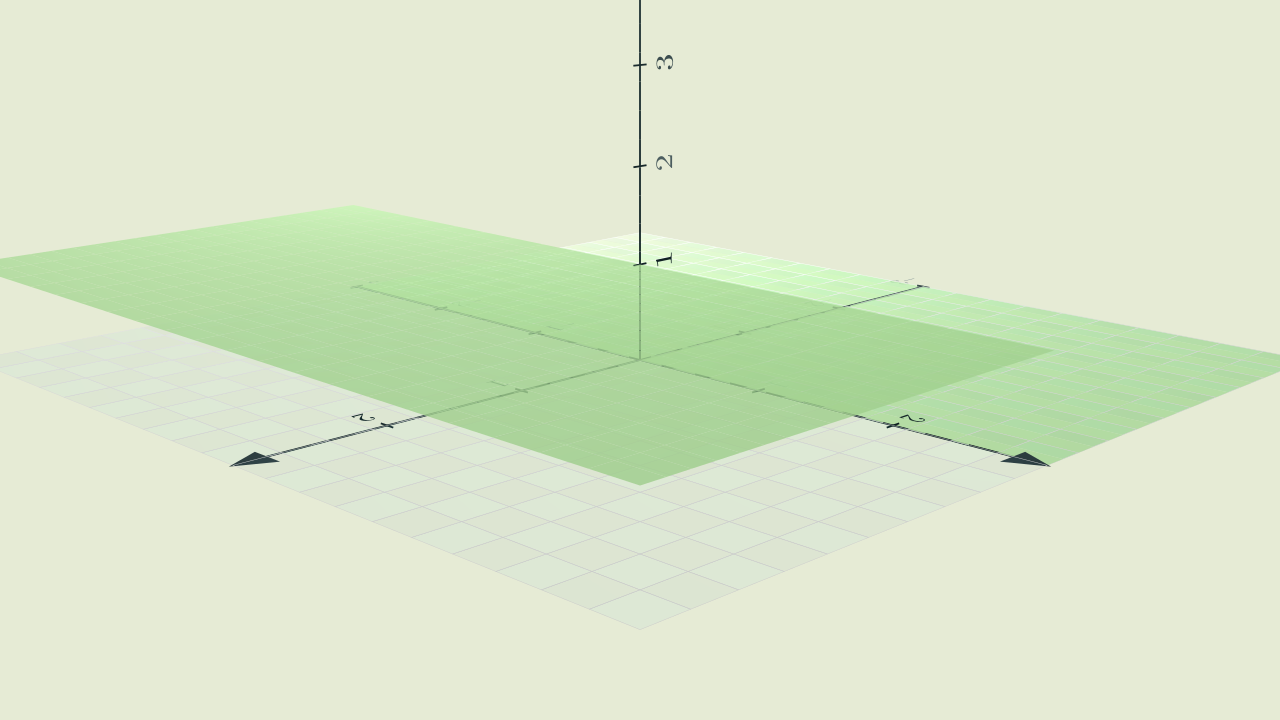

In [51]:
%%manim -qm -v WARNING -s Step